#      IRIS FLOWER CLASSIFICATION - TASK 1

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings

In [6]:
# Suppress specific warnings
warnings.filterwarnings("ignore", message=".*figure layout has changed to tight.*")

## Importing Dataset

In [7]:
# 1. Load and Explore the Dataset
df = pd.read_csv(r"C:\Users\anand\OneDrive\Desktop\Iris.csv")

In [8]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
# Print the column names
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [10]:
# Check for null values
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
# Basic statistics of the dataset
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


## Data Preprocessing stage and splitting training and test sets

In [12]:
# 2. Data Preprocessing
# Separate features and labels
X = df.drop(columns=['Species'])  
y = df['Species']  

In [13]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Using Exploratory Data Analysis

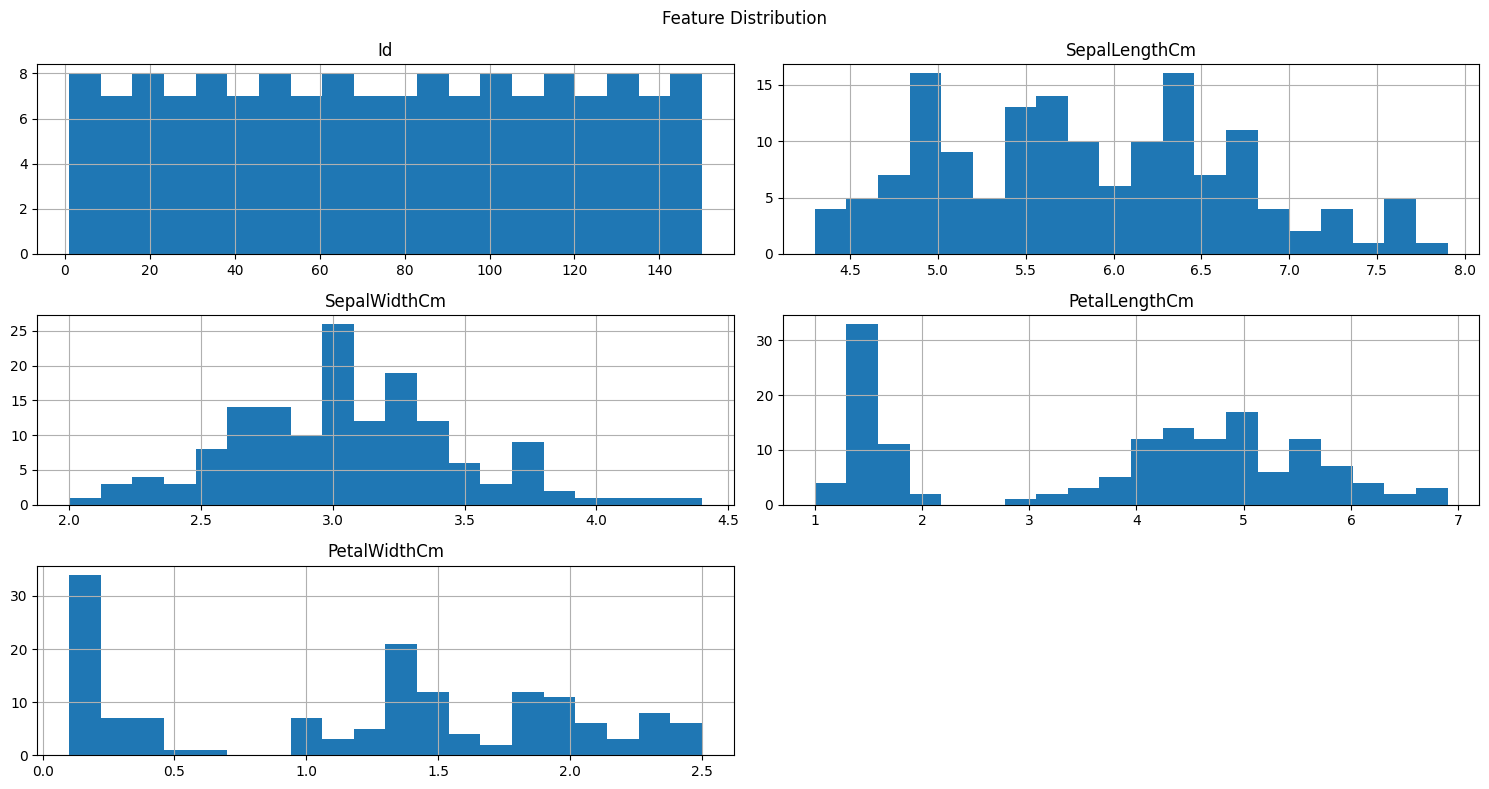

In [15]:
# 3. Exploratory Data Analysis (EDA)
# Plot histograms for each feature
df.hist(figsize=(15,8), bins=20)
plt.suptitle('Feature Distribution')
plt.tight_layout()  # Adjust layout
plt.show()

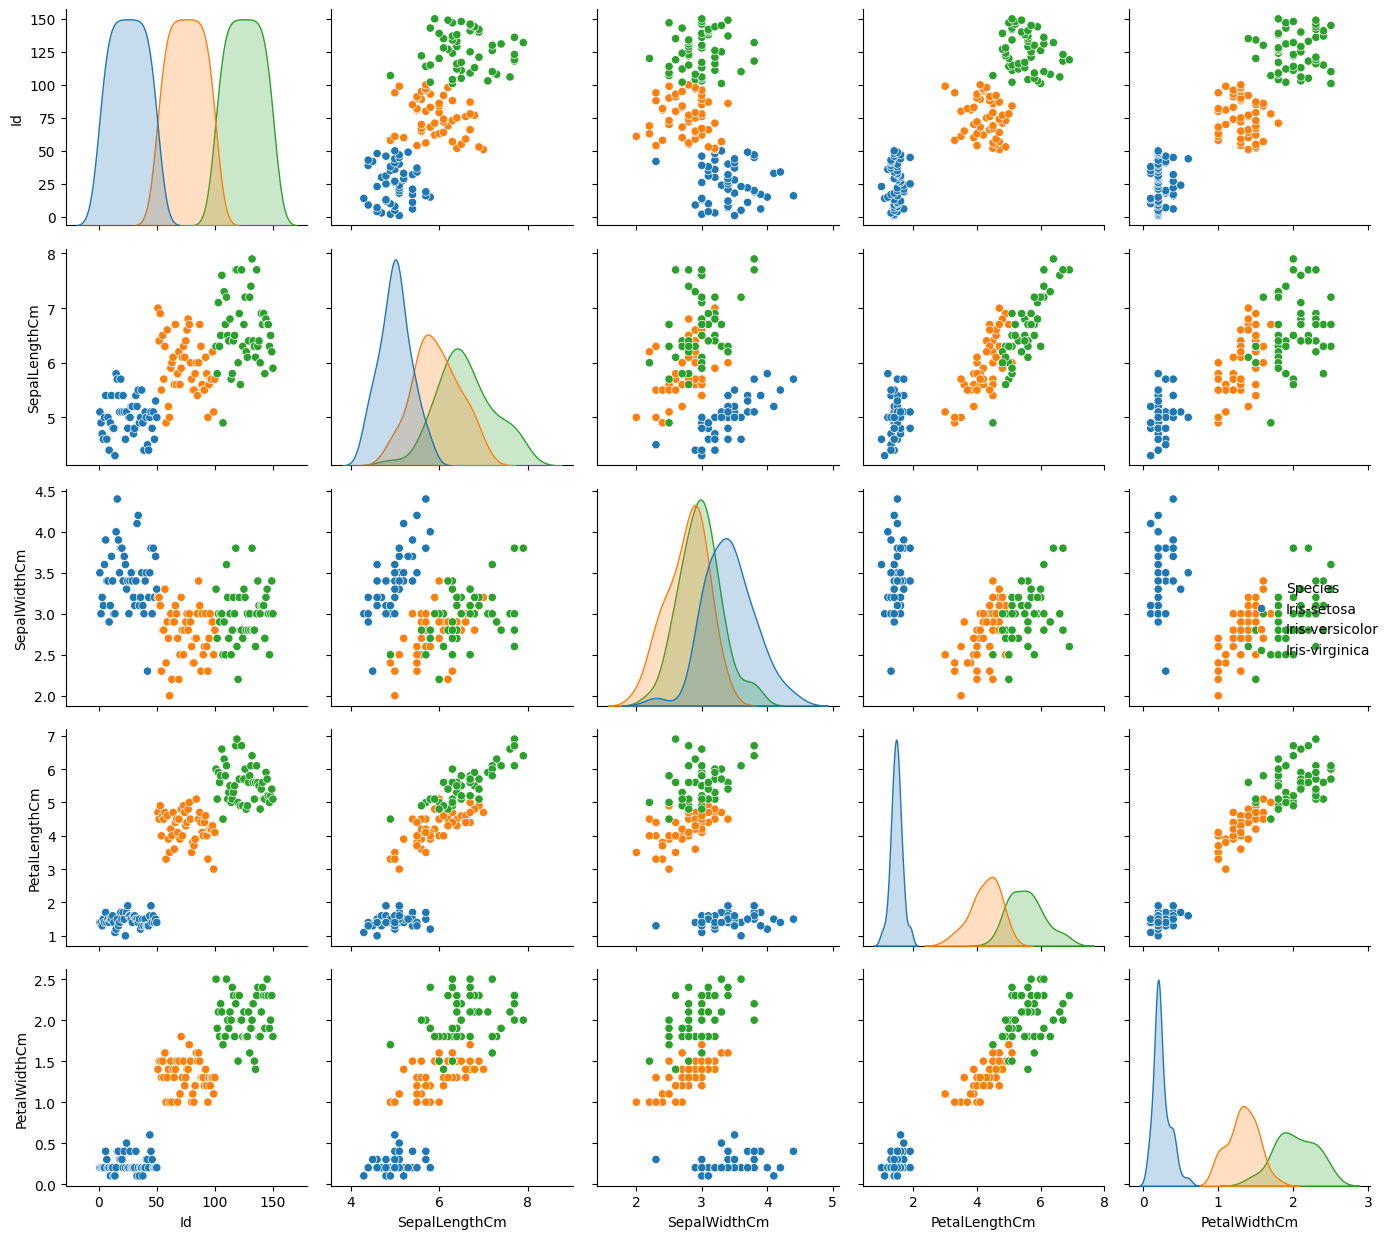

In [16]:
# Plot pairplot with correct column name
sns.pairplot(df, hue='Species')  
plt.tight_layout()  
plt.show()

In [17]:
# 4. Model Selection and Training
# Initialize and train the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [19]:
# 5. Model Evaluation
# Predict the labels on the test set
y_pred = model.predict(X_test)

In [20]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Confusion Matrix

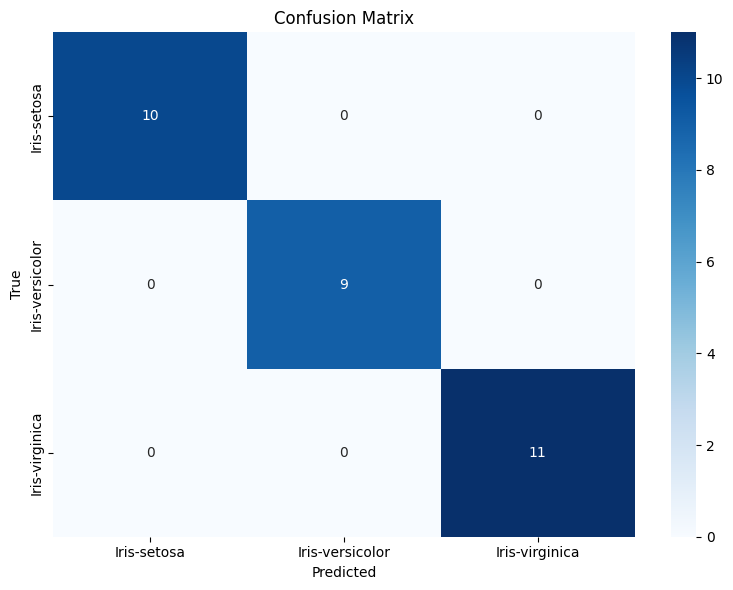

In [21]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()  # Adjust layout
plt.show()

## Generate a Classification Report

In [22]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Plotting Decision Boundaries

In [23]:
# Plotting Decision Boundaries (for 2D data)
def plot_decision_boundaries(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, Y[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.tight_layout()  # Adjust layout
    plt.show()

In [24]:
# 6. Feature Importance (if using RandomForestClassifier)
# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

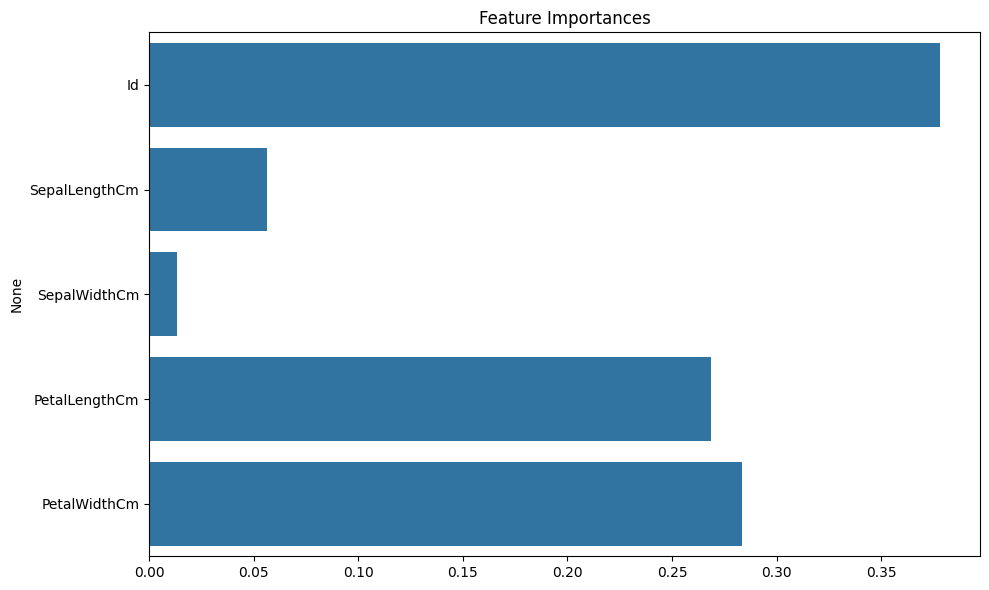

In [25]:
# Plot feature importances
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.tight_layout()  # Adjust layout
plt.show()

## Visualization of Predictions

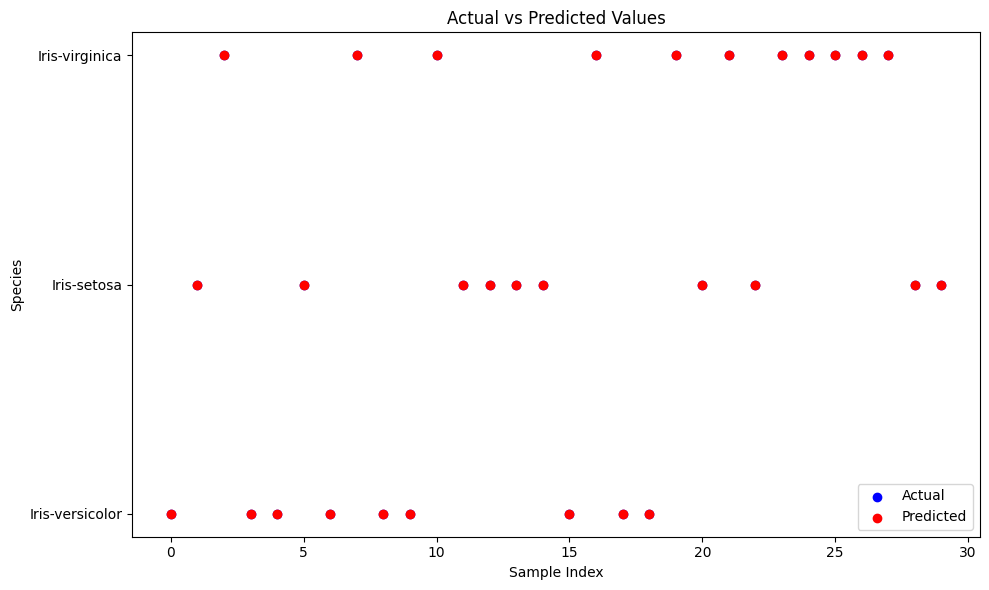

In [26]:
# 8. Visualization of Predictions
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Species')
plt.legend()
plt.tight_layout()  
plt.show()